## Predicting Malignant Tumors
### Wisconsin Diagnostic Beast Cancer Dataset
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Dataset attributes:
     
     0. diagnosis (malignant or benign)
     
     1. radius (mean of distances from center to points on the perimeter)
	 2. texture (standard deviation of gray-scale values)
	 3. perimeter
	 4. area
	 5. smoothness (local variation in radius lengths)
	 6. compactness (perimeter^2 / area - 1.0)
	 7. concavity (severity of concave portions of the contour)
	 8. concave points (number of concave portions of the contour)
	 9. symmetry 
	 10. fractal dimension ("coastline approximation" - 1)

In [1]:
%matplotlib inline
from sklearn.decomposition import PCA
import sys
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import seaborn as sns
sns.set_context('talk')

In [2]:
#import PCA models

from pandas.tools.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
# load dataset

dfall = pd.read_csv('wdbc.data.txt')
# drop standard error and largest value for each attribute
df = dfall.drop(dfall.columns[[0,3,4,6,7,9,10,12,13,15,16,18,19,21,22,24,25,27,28,30,31]],axis=1)
# name columns
df.columns = ['diagnosis','radius','texture','perimeter','area','smoothness','comactness','concavity','concave points','symmetry','fractal dimension']

In [4]:
print(df.shape)
print(df.describe())

(568, 11)
           radius      texture   perimeter        area  smoothness  \
count  568.000000   568.000000  568.000000  568.000000  568.000000   
mean    14.120491   654.279754    0.088427    0.062770    2.855984   
std      3.523416   351.923751    0.079294    0.007035    2.009288   
min      6.981000   143.500000    0.000000    0.049960    0.757000   
25%     11.697500   420.175000    0.029540    0.057697    1.605000   
50%     13.355000   548.750000    0.061400    0.061515    2.285500   
75%     15.780000   782.625000    0.129650    0.066120    3.336750   
max     28.110000  2501.000000    0.426800    0.097440   21.980000   

       comactness   concavity  concave points    symmetry  fractal dimension  
count  568.000000  568.000000      568.000000  568.000000         568.000000  
mean     0.025437    0.020526       25.691919    0.132316           0.114341  
std      0.017897    0.008264        6.141662    0.022818           0.065484  
min      0.002252    0.007882       12.0200

In [5]:
print(df.groupby('diagnosis').size())
df.head()

diagnosis
B    357
M    211
dtype: int64


,diagnosis,radius,texture,perimeter,area,smoothness,comactness,concavity,concave points,symmetry,fractal dimension
0,M,20.57,1326.0,0.0869,0.05667,3.398,0.01308,0.01389,23.41,0.1238,0.1860
1,M,19.69,1203.0,0.1974,0.05999,4.585,0.04006,0.02250,25.53,0.1444,0.2430
2,M,11.42,386.1,0.2414,0.09744,3.445,0.07458,0.05963,26.50,0.2098,0.2575
3,M,20.29,1297.0,0.1980,0.05883,5.438,0.02461,0.01756,16.67,0.1374,0.1625
4,M,12.45,477.1,0.1578,0.07613,2.217,0.03345,0.02165,23.75,0.1791,0.1741


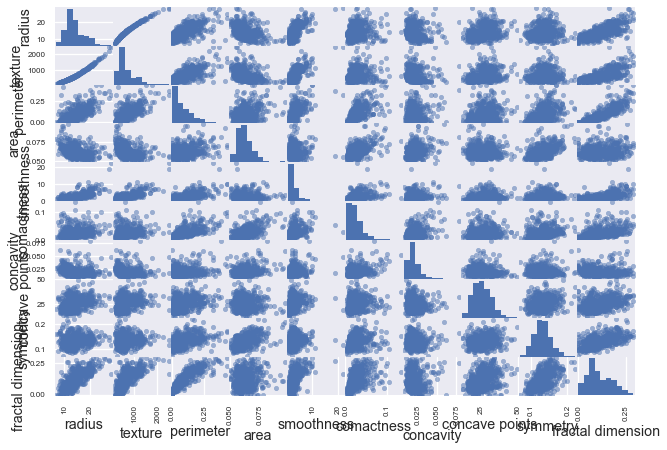

In [6]:
scatter_matrix(df)
plt.show()

In [7]:
X = df.ix[:,1:11]
X.tail()

,radius,texture,perimeter,area,smoothness,comactness,concavity,concave points,symmetry,fractal dimension
563,21.56,1479.0,0.24390,0.05623,7.673,0.02891,0.01114,26.40,0.14100,0.2216
564,20.13,1261.0,0.14400,0.05533,5.203,0.02423,0.01898,38.25,0.11660,0.1628
565,16.60,858.1,0.09251,0.05648,3.425,0.03731,0.01318,34.12,0.11390,0.1418
566,20.60,1265.0,0.35140,0.07016,5.772,0.06158,0.02324,39.42,0.16500,0.2650
567,7.76,181.0,0.00000,0.05884,2.548,0.00466,0.02676,30.37,0.08996,0.0000


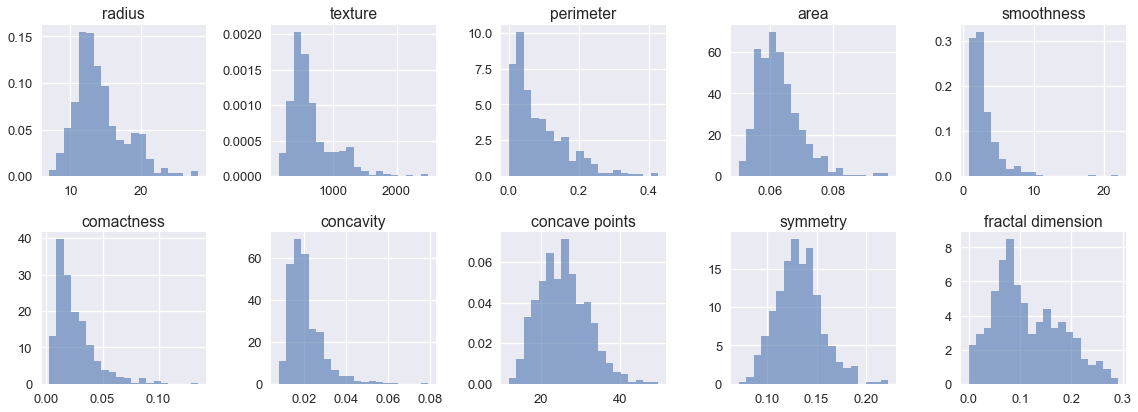

In [8]:
# plot histogram distribution of each attribute
plt.figure(figsize=(16,6))
plt.subplot(2,5,1)
k = 1
for c in X.columns:
    plt.subplot(2,5,k)
    plt.hist(X[c],normed=True,alpha=0.6,bins=20)
    plt.title(c)
    k += 1
plt.tight_layout()

### Scaling and Centering

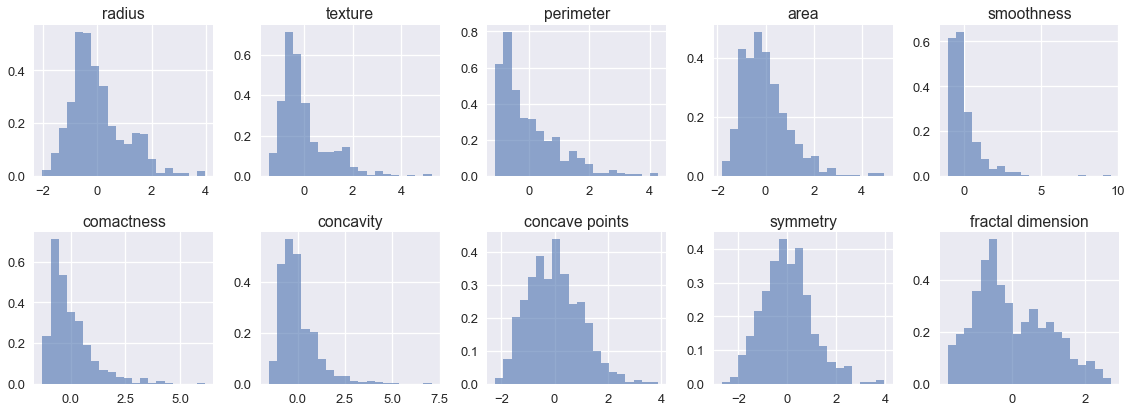

In [9]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

lbls = X.columns

plt.figure(figsize=(16,6))
plt.subplot(2,5,1)
k = 0
for c in lbls:
    plt.subplot(2,5,k+1)
    plt.hist(X_std[:,k],normed=True,alpha=0.6,bins=20)
    plt.title(c)
    k += 1
plt.tight_layout()

### PCA Analysis

In [10]:
pca = PCA(n_components=3)
Y = pca.fit_transform(X_std)

[ 0.44692964  0.21996534  0.12748014]


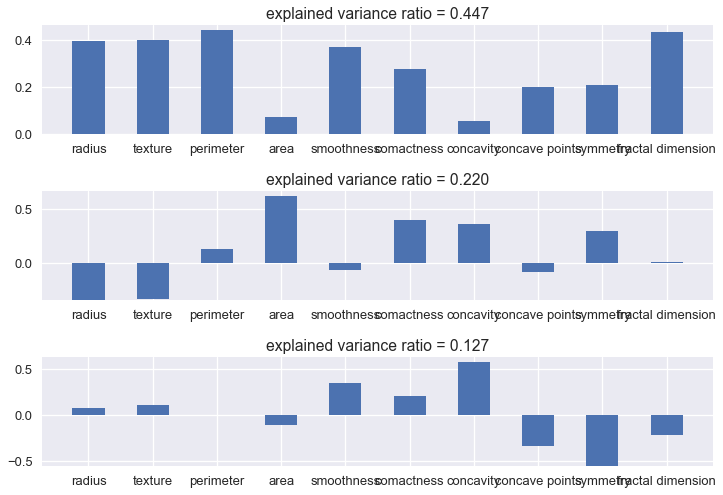

In [11]:
w = pca.components_
v = pca.explained_variance_ratio_
print(v)

for k in range(0,len(w)):
    plt.subplot(3,1,k+1)
    plt.bar(range(0,len(w[k])),w[k],width=.5)
    plt.xticks(range(0,len(w[k])),lbls)
    plt.title('explained variance ratio = {0:.3f}'.format(v[k]))

plt.tight_layout()

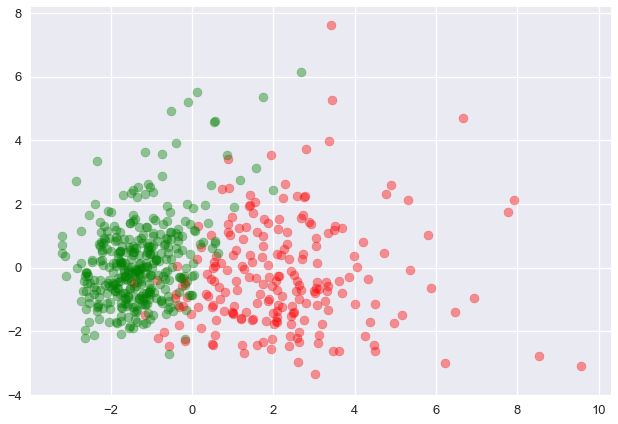

In [12]:
k = 0
for n in df['diagnosis']:
    if(df.ix[k,0] == 'M'):
        plt.scatter(Y[k,0],Y[k,1],color='red',alpha=0.4)
    else:
        plt.scatter(Y[k,0],Y[k,1],color='green',alpha=0.4)
    k += 1

### Predictive Analysis
Train predictive models to identify malignant tumors and choose the most accurate model to test on a validation set of data

In [13]:
# split out validation dataset
diagnosisarray = df.values
dfvals = df.drop(df.columns[[0]],axis=1)
#print(dfvals.head())
array = dfvals.values
X = array[:,0:9]
Y = diagnosisarray[:,0]

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [14]:
#check algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

#evaluate each model
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.929469 (0.040332)
LDA: 0.964589 (0.031734)
KNN: 0.898406 (0.069139)
CART: 0.916280 (0.027693)
NB: 0.922754 (0.028760)
SVM: 0.702560 (0.063240)


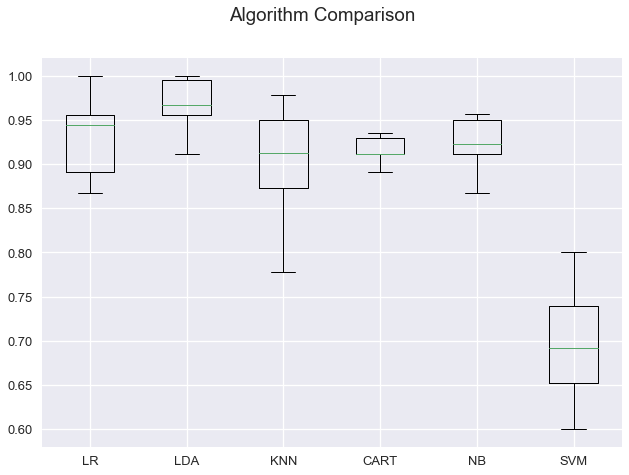

In [15]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LDA is the most accurate.
Use LDA model to evaluate the validation dataset

In [16]:
# make predictions on validation dataset
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.956140350877
[[77  1]
 [ 4 32]]
             precision    recall  f1-score   support

          B       0.95      0.99      0.97        78
          M       0.97      0.89      0.93        36

avg / total       0.96      0.96      0.96       114



In [17]:
# make predictions on validation dataset
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.912280701754
[[75  3]
 [ 7 29]]
             precision    recall  f1-score   support

          B       0.91      0.96      0.94        78
          M       0.91      0.81      0.85        36

avg / total       0.91      0.91      0.91       114

